# Chapter 2: End-to-End ML Project

## Imports

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

To import the data:

In [1]:
import os
import tarfile
import urllib

## Some definitions

- Data snooping bias: when the Data Scientist's brain unknowingly starts extracting patterns from the entire dataset, which leads to overfitting the test sample.

## Open datasets

Open data reports:
- UC Irvine ML repo
- Kaggle datasets
- AWS datasets

Meta portals, that list open data repositories:
- Data Portals
- OpenDataMonitor
- Quandl

Other listings
- Wikipedia's list of ML datasets
- Quora.com
- The datasets subreddit

## Download the Data

The dataset is the 1990 California Census Project. The objective is to predict median house prices.

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = os.path.join(DOWNLOAD_ROOT, HOUSING_PATH, "housing.tgz")

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # create datasets/housing
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    # download tgz file (src, dest)
    urllib.request.urlretrieve(housing_url, tgz_path)
    # get tgz object
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

The tgz file contains a csv file, `housing.csv`. Load the data using pandas:

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

Run all:

In [5]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Total size: 20640. Some districts are missing their total bedrooms.

To analyse the categorical value `ocean_proximity`, we can use the `value_counts` method:

In [7]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Use `describe` to explore numerical fields. As in SQL, aggregates are computed only using non-missing values. The number of non-missing values can be found by looking at the count row.

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Plotting histograms of each numerical field is fairly easy:

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

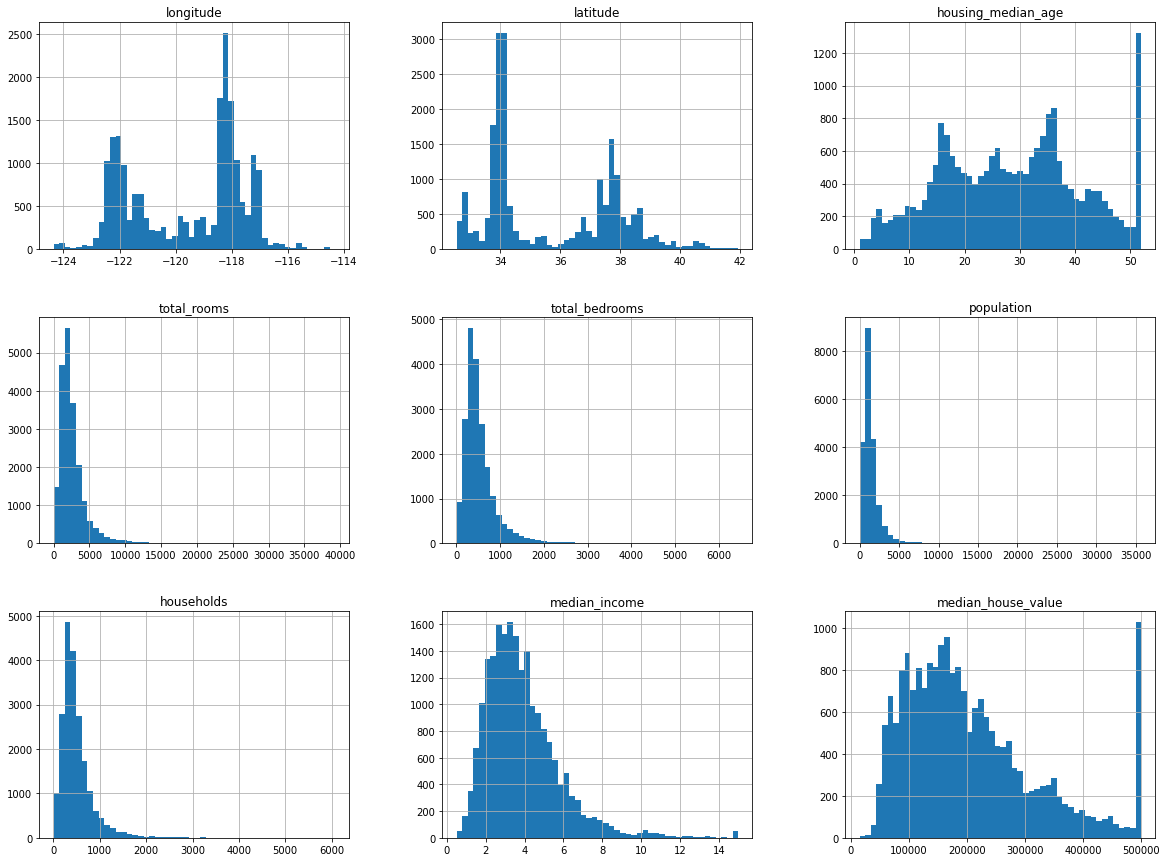

In [9]:
%matplotlib inline
housing.hist(bins=50, figsize=(20, 15))

Some notes about the data:
- Median income attributed is actually expressed in thousands of dollars.
- Median income, housing median age and median house value have been capped.
    - The latter is specially worrying as it is our target value. If we wanted to predict house values beyond 500000, we would have two options:
     1. Get data for capped districts
     2. Remove capped observations from the data altogether (hope that our model extrapolates well)
- Each attribute has very different scales
- Many features display tail-heavy distributions, which may worsen some ML algorithms' learning

## Strategies to Create Test Sets

### Strategy 1: Random Sample

In [10]:
import numpy as np
def split_train_test(data, test_ratio):
    nrows = data.shape[0]
    shuffled_indices = np.random.permutation(nrows)
    test_set_size = int(nrows*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

**Problem with this approach**
Every time you run it, you get different train and test sets, so your ML algorithm ends up seeing the entire dataset. Two possible workarounds:
- Save train/test sets
- Use a random seed

However, the problem persists when updating the dataset. A common solution is the Hashing Strategy

### Strategy 2: Hashing

Hash an id for each observation, put an observation into the test set if the hash is lower than or equal the 20 % maximum hash value.

Example of implementation:

In [11]:
# Cyclic redundancy check, basically maps Python objects other than integers to a 32-bit integer
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio* 2**32

In [12]:
def split_train_test_by_id(data, test_ratio, id_column):
    in_test_set = data[id_column].apply(lambda _id: test_set_check(_id, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
housing_with_id = housing.reset_index()  # add `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, .2, "index")

Check data split proportions:

In [14]:
len(test_set)/(len(train_set) + len(test_set)) * 100

20.0

It works like a charm!

The underlying assumption to provide stability in the division of observations is that all new data is appended at the end, and that no rows are ever deleted.

If there was another stable identifier in the database, we could use that instead to apply the split. In our example, we can use te longitude and the latitude:

In [15]:
housing_with_id["geo_id"] = housing["longitude"] + 1000* housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, .2, "geo_id")

In [16]:
len(test_set)/(len(train_set) + len(test_set)) * 100

19.113372093023255

In this case, since the geolocation information is a bit coarse, we introduce some sampling bias. A quick way to check that is by counting the values of geo_id:

In [18]:
housing_with_id["geo_id"].value_counts()

37677.59    15
37657.56    11
37677.58    11
37627.59    10
37637.53    10
            ..
32562.89     1
37747.50     1
33652.14     1
41416.08     1
33743.92     1
Name: geo_id, Length: 12590, dtype: int64

Where we notice that in effect, the new id does not perfectly identify each observation!

### Strategy 3: Stratifying

Imagine that the median income in a region is a key variable to predict house prices. We may want that our sampling represents the various categories of incomes in the dataset. To do that, we can create a number of categories in the sample with respect to median income and sample from each.

#### Step 1: Create median income categories

<AxesSubplot:>

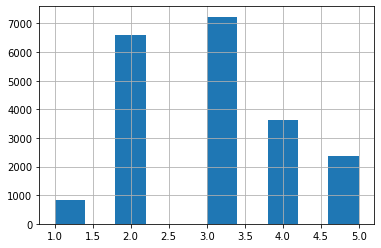

In [20]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3., 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

#### Step 2: Sample from each category separately

One easy solution is to use `sklearn.StratifiedShuffleSplit`

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
n_iters = 0
for train_index, test_index in split.split(housing, housing["income_cat"]):
    n_iters += 1
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
n_iters

2

The code above works because we only create a single train and test split from the full dataset, by specifying `n_splits` equal 1. We can quickly check that we haven't lost any observations...

In [27]:
len(strat_train_set) + len(strat_test_set) == len(housing)

True

Removing `income_cat` from original dataset:

In [28]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Explore the Data

In [30]:
train_housing = strat_train_set.copy()

A cool trick: use transparency to be able to identify places of high-density of districts.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

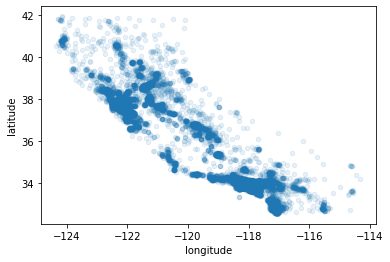

In [32]:
train_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=.1)

Add two dimensions: district's population as size, and district's median price as colour. Notice that we divide size by 100, to avoid having the circles clutter the figure.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

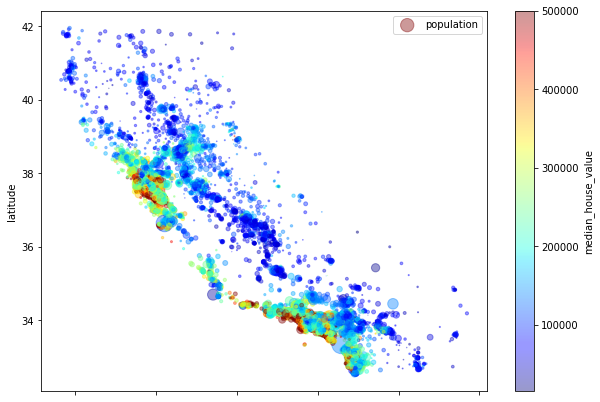

In [37]:
train_housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=.4,
    s=train_housing["population"]/100,
    label="population",
    figsize=(10, 7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True
)

We note that the proximity to high density cluster centers and to the coast are important factors to determine the median price. However, the proximity to the ocean rule does not apply to houses in Northern California. 

### Looking for Correlations

In [38]:
corr_matrix = train_housing.corr()

In particular, let's focus on the correlation w.r.t median house value:

In [41]:
corr_house_value = corr_matrix["median_house_value"].abs().sort_values(ascending=False)
corr_house_value

median_house_value    1.000000
median_income         0.687014
latitude              0.144854
total_rooms           0.139801
housing_median_age    0.098433
households            0.069613
total_bedrooms        0.054374
longitude             0.043442
population            0.021903
Name: median_house_value, dtype: float64

Notice that I'm simply focusing on the absolute value...we don't care if the correlation is positive or negative. Let's take the most important four attributes according to the correlation measure:

In [48]:
four_most_relevant_features = list(corr_house_value.index[1:5])
four_most_relevant_features

['median_income', 'latitude', 'total_rooms', 'housing_median_age']

Let's use the pretty cool pandas function `scatter_matrix`, which plots every numerical attribute against every other numerical attribute.

array([[<AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_income', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>],
       [<AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='latitude', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='latitude', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', yla

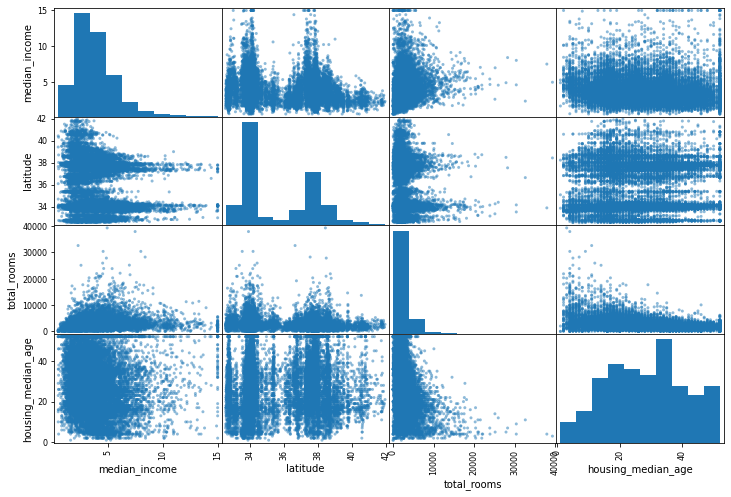

In [49]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_housing[four_most_relevant_features], figsize=(12, 8))

Having the histogram is useful to compare how each other attribute transforms the original distribution. For example, in latitude VS median_income we observe that the districts with highest median income always lie in the latitude clusters.

We can also focus on the most promising feature -median_income- and plot it against the median house value:

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

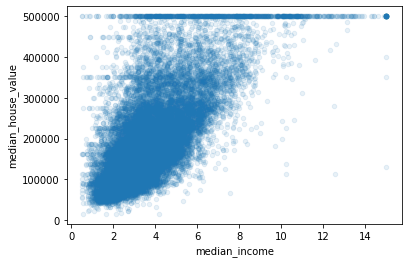

In [50]:
housing.plot(
    kind="scatter",
    x="median_income",
    y="median_house_value",
    alpha=.1
)

Two points to make from this graph:

1. The linear correlation is quite strong
2. There seems to be some sampling clustering around round values such as 350000, 450000, 500000...that break this relationship

### Experimenting Attribute Combinations

**Small exercise**. Create the following -presumptously more relevant- features:
1. Average number of rooms per household
2. Proportion of bedrooms to total rooms
3. Population per household

**Solution**. Let's start by having a look at the features available:

In [51]:
train_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [52]:
train_housing["rooms_per_household"] = train_housing["total_rooms"]/train_housing["households"]
train_housing["proportion_bedrooms"] = train_housing["total_bedrooms"]/train_housing["total_rooms"]
train_housing["pop_per_household"] = train_housing["population"]/train_housing["households"]

And let's see how these new features score in terms of absolute correlations:

In [55]:
train_housing.corr()["median_house_value"].abs().sort_values(ascending=False)

median_house_value     1.000000
median_income          0.687014
proportion_bedrooms    0.256332
rooms_per_household    0.154133
latitude               0.144854
total_rooms            0.139801
housing_median_age     0.098433
households             0.069613
total_bedrooms         0.054374
longitude              0.043442
pop_per_household      0.027443
population             0.021903
Name: median_house_value, dtype: float64

We get a couple of good-scoring features: the proportion of bedrooms, and the rooms per household. Before trying to make sense of these relations, we should compute the actual correlation (negative, positive) of each of them.

In [56]:
train_housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.687014
rooms_per_household    0.154133
total_rooms            0.139801
housing_median_age     0.098433
households             0.069613
total_bedrooms         0.054374
population            -0.021903
pop_per_household     -0.027443
longitude             -0.043442
latitude              -0.144854
proportion_bedrooms   -0.256332
Name: median_house_value, dtype: float64